# Comparison of Classification Algorithms

##### This analysis used the Cardiovascular Disease dataset available here from Kaggle: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

The dataset consists of 12 variables:

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

### Objective

The goal of this analysis is to test numerous classification algorithms and decide which is optimal for predicting cardiovascular disease.  We will test the following algorithms:

1. KNN

2. Logistic Regression

3. Decision Tree

4. Random Forest

5. XGBoost

## Initial Data Preparation

In [1]:
# Import Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import svm
import xgboost as xgb
import os

In [2]:
# Establish Working Directory

os.chdir("/Users/danielborrero/Documents/Python")

In [3]:
# Import Dataset

data=pd.read_csv("cardio.csv", delimiter=';')
df=data.copy()
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.shape

(70000, 13)

In [5]:
# Check for null values

df.isnull().any()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [6]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [7]:
# Drop "id" column as it's only an index

df.drop(columns="id", inplace=True)

In [8]:
# Converting Days to Years (Rounded Down)

df['age']=(df['age']/365.25).apply(np.floor)

In [9]:
# Converting Metric to Imperial (Rounded Down)

df['height']=(df['height']/2.54).apply(np.floor)

df['weight']=(df['weight']*2.20462).apply(np.floor)

In [10]:
# Reclassify 'gender'

# Male = 1, Female = 0

map={1:1, 2:0}
df['gender']=df['gender'].replace(map)

In [11]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,0,66.0,136.0,110,80,1,1,0,0,1,0
1,55.0,1,61.0,187.0,140,90,3,1,0,0,1,1
2,51.0,1,64.0,141.0,130,70,3,1,0,0,0,1
3,48.0,0,66.0,180.0,150,100,1,1,0,0,1,1
4,47.0,1,61.0,123.0,100,60,1,1,0,0,0,0


## Data Partition

We partition the data into a train and a test set using a 70/30 split

In [12]:
x=df.drop('cardio', axis=1)
y=df['cardio']

In [13]:
# Converting to DMatrix for the XGBoost Model

#df_dmatrix = xgb.DMatrix(data=x,label=y)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 77)

## Modeling

Our models are built with default parameters

### KNN

In [15]:
# Building the Model

knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_knnpred=knn.predict(x_test)

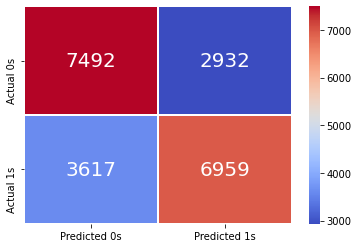

Accuracy: 68.8143%


In [16]:
# Confusion Matrix

knncm = confusion_matrix(y_test, y_knnpred)

knnm=sns.heatmap(knncm, annot=True,linewidths=1,linecolor="white",fmt = ".0f", cmap="coolwarm", annot_kws={"fontsize":20})
knnm.xaxis.set(ticks=(.5, 1.5), ticklabels=('Predicted 0s', 'Predicted 1s'))
knnm.yaxis.set(ticks=(.5, 1.5), ticklabels=('Actual 0s', 'Actual 1s'))
plt.show()

print("Accuracy: " '{:.4%}'.format(metrics.accuracy_score(y_test, y_knnpred)))

### Logistic Regression

In [17]:
# Building the Model

# Max Iterations were set to 1000 as the model failed to converge with the default iteration setting (max_iter=100)

lr=LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
y_lrpred=lr.predict(x_test)

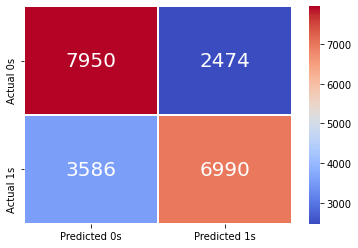

Accuracy: 71.1429%


In [18]:
# Confusion Matrix

lrcm = confusion_matrix(y_test, y_lrpred)

lrm=sns.heatmap(lrcm, annot=True,linewidths=1,linecolor="white",fmt = ".0f", cmap="coolwarm", annot_kws={"fontsize":20})
lrm.xaxis.set(ticks=(.5, 1.5), ticklabels=('Predicted 0s', 'Predicted 1s'))
lrm.yaxis.set(ticks=(.5, 1.5), ticklabels=('Actual 0s', 'Actual 1s'))
plt.show()

print("Accuracy: " '{:.4%}'.format(metrics.accuracy_score(y_test, y_lrpred)))

### Decision Tree

In [19]:
# Building the Model

dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_dtpred=dt.predict(x_test)

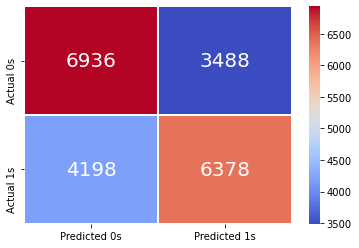

Accuracy: 63.4000%


In [20]:
# Confusion Matrix

dtcm = confusion_matrix(y_test, y_dtpred)

dtm=sns.heatmap(dtcm, annot=True,linewidths=1,linecolor="white",fmt = ".0f", cmap="coolwarm", annot_kws={"fontsize":20})
dtm.xaxis.set(ticks=(.5, 1.5), ticklabels=('Predicted 0s', 'Predicted 1s'))
dtm.yaxis.set(ticks=(.5, 1.5), ticklabels=('Actual 0s', 'Actual 1s'))
plt.show()

print("Accuracy: " '{:.4%}'.format(metrics.accuracy_score(y_test, y_dtpred)))

### Random Forest

In [21]:
# Building the Model

rf=RandomForestClassifier()
rf.fit(x_train, y_train)
y_rfpred=rf.predict(x_test)

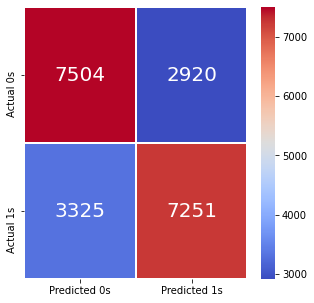

Accuracy: 70.2619%


In [35]:
# Confusion Matrix

rfcm = confusion_matrix(y_test, y_rfpred)

rfm=sns.heatmap(rfcm, annot=True,linewidths=1,linecolor="white",fmt = ".0f", cmap="coolwarm", annot_kws={"fontsize":20})
rfm.xaxis.set(ticks=(.5, 1.5), ticklabels=('Predicted 0s', 'Predicted 1s'))
rfm.yaxis.set(ticks=(.5, 1.5), ticklabels=('Actual 0s', 'Actual 1s'))
plt.show()

print("Accuracy: " '{:.4%}'.format(metrics.accuracy_score(y_test, y_rfpred)))

### XGBoost

In [23]:
# Building the Model

xg = xgb.XGBClassifier(use_label_encoder=False)
xg.fit(x_train, y_train)
y_xgpred=xg.predict(x_test)

[09:51:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


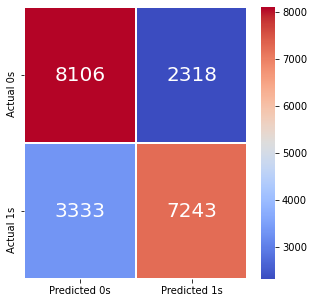

Accuracy: 73.0905%


In [36]:
# Confusion Matrix

xgcm = confusion_matrix(y_test, y_xgpred)

xgm=sns.heatmap(xgcm, annot=True,linewidths=1,linecolor="white",fmt = ".0f", cmap="coolwarm", annot_kws={"fontsize":20})
xgm.xaxis.set(ticks=(.5, 1.5), ticklabels=('Predicted 0s', 'Predicted 1s'))
xgm.yaxis.set(ticks=(.5, 1.5), ticklabels=('Actual 0s', 'Actual 1s'))
plt.show()

print("Accuracy: " '{:.4%}'.format(metrics.accuracy_score(y_test, y_xgpred)))

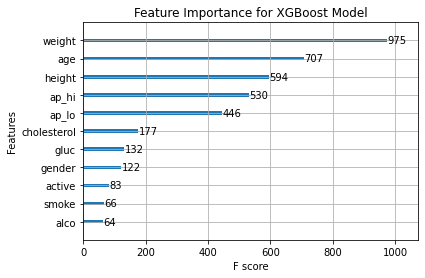

In [25]:
xgb.plot_importance(xg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.title("Feature Importance for XGBoost Model")
plt.show()

In [26]:
models = [knn,lr,dt, rf, xg]

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*24)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

------------------------
KNeighborsClassifier:
Accuracy: 68.8143%
------------------------
LogisticRegression:
Accuracy: 71.1429%
------------------------
DecisionTreeClassifier:
Accuracy: 63.4000%
------------------------
RandomForestClassifier:
Accuracy: 70.2619%
------------------------
XGBClassifier:
Accuracy: 73.0905%


Comparing the accuracies for each model, the XGBoost model preformed best with an accuracy of 73.09%.  Logistic Regression was second best at 71.14% and the Decison Tree performed worst at 63.4%.

### ROC Curve

In [27]:
# KNN
knn_roc_auc = roc_auc_score(y_test, knn.predict(x_test))
knn_fpr, knn_tpr, knn_thresholds = metrics.roc_curve(y_test, knn.predict_proba(x_test)[:,1])

# Logistic Regression
lr_roc_auc = roc_auc_score(y_test, lr.predict(x_test))
lr_fpr, lr_tpr, lr_thresholds = metrics.roc_curve(y_test, lr.predict_proba(x_test)[:,1])

# Decision Tree
dt_roc_auc = roc_auc_score(y_test, dt.predict(x_test))
dt_fpr, dt_tpr, dt_thresholds = metrics.roc_curve(y_test, dt.predict_proba(x_test)[:,1])

# Random Forest
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve(y_test, rf.predict_proba(x_test)[:,1])

# XGBoost
xg_roc_auc = roc_auc_score(y_test, xg.predict(x_test))
xg_fpr, xg_tpr, xg_thresholds = metrics.roc_curve(y_test, xg.predict_proba(x_test)[:,1])

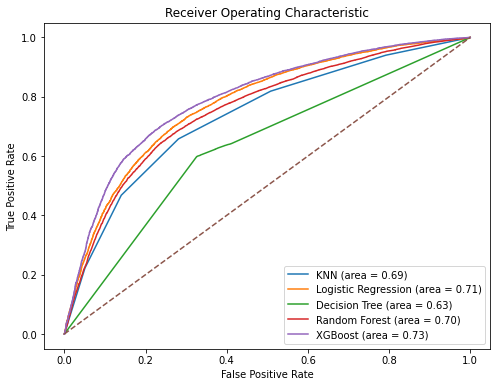

In [28]:
# Plotting ROC for Each Model

plt.figure(figsize=(8,6)) 
plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(xg_fpr, xg_tpr, label='XGBoost (area = %0.2f)' % xg_roc_auc)
plt.plot([0, 1], [0, 1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Again, the XGBoost model is ranked highest with an AUC of 0.73.